# COVID-19 Risk Stratification
(description}

## Dataset 

In [63]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
xls = pd.ExcelFile('/home/shikha/Documents/PS1/COVID-19/input/Hospital104.xlsx')
df = pd.read_excel(xls, 'Batch2_Data')

In [3]:
df

,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,Cough,...,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,D-DIMER,IL-6,SERUM FERRITIN,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY
0,1013,IGIB1040201013,IGIB1040201013-1,53,1,22.5,"fever, cough,breathlessness",1,1,1,...,8.0,NaN,98,NaN,NaN,sinus rhythm,normal,4,5a,No
1,1014,IGIB1040201014,IGIB1040201014-1,26,0,25.7,asymptomatic,0,0,0,...,NaN,NaN,0.2,NaN,NaN,sinus rhythm,normal,0,5b,No
2,1015,IGIB1040201015,IGIB1040201015-1,28,1,22.2,asymptomatic,0,0,0,...,4.0,0.20,0.35,NaN,NaN,sinus rhythm,normal,0,5b,No
3,1016,IGIB1040201016,IGIB1040201016-1,73,1,21.5,"fever, cough,breathlessness",1,1,1,...,NaN,NaN,NaN,63.31,NaN,sinus rhythm,normal,5,4,No
4,1060,IGIB1040201060,IGIB1040201060-1,49,1,27.4,"fever,cough",1,1,1,...,8.0,NaN,350.55,4.33,NaN,sinus rhythm,normal,5,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,950,IGIB104020950,IGIB104020950-1,53,1,27.2,"fever, cough,breathlessness",1,1,1,...,14.0,NaN,410,NaN,NaN,sinus rhythm,normal,5,4,No
187,965,IGIB104020965,IGIB104020965-1,33,1,26.0,"fever, cough,breathlessness",1,1,1,...,6.0,NaN,1120,37.90,NaN,sinus tachycardia,normal,5,4,No
188,9667,IGIB1040209667,IGIB1040209667-1,70,1,21.4,"fever, breathlessness",1,1,0,...,8.0,0.54,1078,735.60,NaN,sinus rhythm,normal,5,4,No
189,9759,IGIB1040209759,IGIB1040209759-1,65,0,22.4,breathlessness and cough,1,0,1,...,6.0,NaN,1224,NaN,NaN,sinus rhythm,normal,6,4,No


In [4]:
df.describe()

,Sample No.,Age,Gender,BMI,Symptoms Present?,Fever,Cough,Breathlessness,Travel History,Temp,...,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,LACTATE DEHYDROGENASE4,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,IL-6,SERUM FERRITIN
count,191.000000,191.000000,191.000000,188.000000,191.000000,191.000000,191.000000,191.000000,191.000000,189.000000,...,184.000000,184.000000,182.000000,182.000000,182.000000,101.000000,92.000000,51.000000,47.000000,65.000000
mean,4674.560209,47.471204,0.617801,23.083191,0.832461,0.497382,0.413613,0.392670,0.020942,98.242328,...,38.034783,32.826087,1012.218681,5.593956,105.246703,521.916832,10.808696,1.672549,405.037872,382.350000
std,2650.590877,18.381855,0.487202,1.604113,0.374438,0.501307,0.493775,0.489628,0.143568,1.249386,...,29.426918,427.487868,11775.539089,10.490022,11.940546,471.188023,6.455999,3.022584,1054.095729,502.651379
min,246.000000,5.000000,0.000000,18.700000,0.000000,0.000000,0.000000,0.000000,0.000000,95.700000,...,11.800000,0.300000,11.800000,2.800000,1.100000,11.800000,2.000000,0.010000,0.800000,11.800000
25%,1651.000000,34.000000,0.000000,22.100000,1.000000,0.000000,0.000000,0.000000,0.000000,97.300000,...,21.000000,0.900000,137.000000,3.800000,104.000000,250.000000,6.000000,0.060000,6.550000,111.800000
50%,6257.000000,47.000000,1.000000,22.750000,1.000000,0.000000,0.000000,0.000000,0.000000,98.100000,...,26.700000,1.000000,140.000000,4.300000,108.000000,447.300000,8.000000,0.400000,29.680000,236.900000
75%,6687.500000,60.500000,1.000000,24.100000,1.000000,1.000000,1.000000,1.000000,0.000000,98.900000,...,43.300000,1.200000,143.000000,4.900000,110.000000,666.000000,14.000000,0.900000,260.990000,388.000000
max,9766.000000,92.000000,1.000000,27.400000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000,...,176.000000,5800.000000,159000.000000,104.000000,125.000000,3250.000000,26.000000,12.540000,4967.800000,2378.900000


### Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Sample No.
False    191
Name: Sample No., dtype: int64

Patient ID
False    191
Name: Patient ID, dtype: int64

Study ID
False    191
Name: Study ID, dtype: int64

Age
False    191
Name: Age, dtype: int64

Gender
False    191
Name: Gender, dtype: int64

BMI
False    188
True       3
Name: BMI, dtype: int64

Symptoms Presented
False    191
Name: Symptoms Presented, dtype: int64

Symptoms Present?
False    191
Name: Symptoms Present?, dtype: int64

Fever
False    191
Name: Fever, dtype: int64

Cough
False    191
Name: Cough, dtype: int64

Breathlessness
False    191
Name: Breathlessness, dtype: int64

Travel History
False    191
Name: Travel History, dtype: int64

Temp
False    189
True       2
Name: Temp, dtype: int64

SPO2
False    188
True       3
Name: SPO2, dtype: int64

METHYLPREDNISOLONE
False    191
Name: METHYLPREDNISOLONE, dtype: int64

Low molecular weight heparin
False    191
Name: Low molecular weight heparin, dtype: int64

Hydroxychloroquine
False    191
Name: Hydroxychloro

Outcome is an important parameter for us to measure. We observe that outcome is heavily correlated to ventilatory support sequired, shown below.

In [6]:
df['Outcome'] = pd.to_numeric(df.Outcome, errors='coerce')
outcome = df.dropna(subset=["Outcome","Ventilatory support required"], axis=0)
outcome[["Outcome","Ventilatory support required"]].corr()

,Outcome,Ventilatory support required
Outcome,1.000000,0.904134
Ventilatory support required,0.904134,1.000000


In [85]:
df_gptest = df[['Outcome','Ventilatory support required']]
grouped = df_gptest.groupby(['Outcome','Ventilatory support required'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Outcome',columns='Ventilatory support required')
grouped_pivot

size          
Ventilatory support required    0.0  1.0  2.0
Outcome                                      
0.0                           116.0  1.0  NaN
1.0                             1.0  6.0  9.0

According to the table above, it would be okay to replace the null values of Outcome as 0 if no ventilatory support was needed, and 1 if ventilatory support severity is 1(Non-invasive ventilation) or 2(Intubation).

In [97]:
df['Outcome'].fillna(df['Ventilatory support required'], inplace=True)
df['Outcome'].replace(2,1, inplace=True)
df['Outcome'].value_counts()

0.0    159
1.0     29
Name: Outcome, dtype: int64

## Initial Factors and Vital Signs

Let us take a close look at the initial signs of disease that set in. How much information can we gauge about the patient just when he/she is admitted? Or, can we know the risk level associated with the patient by doing some simple tests at home?

### Features
In this section, we will analyse the following features to gain some idea about how these initial factors and vital signs play a role in the disease onset and severity. We will use the Ventilatory Support to categorize the severity of the disease.

Initial Factors
- Age
- Gender
- BMI
- Contact to N-Covid Person
- Travel history

Vital Signs
- Temperature
- SPO2
- Respiratory Rate
- Random Blood Sugar

These values should be readily available for any patient, and can help in making important decisions regarding the severity of the disease. I believe we can predict if the patient will require ventilatory support or not, which is directly correlated to the outcome of the disease, as shown below.

### Dealing With Missing Values

- BMI, Temperature, Random Blood Sugar: We will replace these values with the mean values.

- Respiratory Rate and SPO2: Some are unavailable, we will drop these rows, since even their ventilatory support data is not available.

In [98]:
avg_BMI=df['BMI'].astype('float').mean(axis=0)
df['BMI'].replace(np.nan, avg_BMI, inplace=True)

avg_Temp=df['Temp'].astype('float').mean(axis=0)
df['Temp'].replace(np.nan, avg_Temp, inplace=True)

avg_BP=df['RANDOM BLOOD SUGAR'].astype('float').mean(axis=0)
df['RANDOM BLOOD SUGAR'].replace(np.nan, avg_BP, inplace=True)

### Normalizing Data


<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1. Here we will use min-max normalization for the BMI and temperature data.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']] = scaler.fit_transform(df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']])
df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']]

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


,Age,BMI,Temp,SPO2,Respiratory rate(breaths per minute),RANDOM BLOOD SUGAR
0,0.551724,0.436782,0.174603,0.833333,0.3,0.259876
1,0.241379,0.804598,0.476190,0.666667,0.1,0.200381
2,0.264368,0.402299,0.428571,0.666667,0.1,0.214660
3,0.781609,0.321839,0.365079,0.666667,0.6,0.255117
4,0.505747,1.000000,0.841270,0.666667,0.3,0.190861
...,...,...,...,...,...,...
186,0.551724,0.977011,0.507937,0.333333,0.7,0.447882
187,0.321839,0.839080,0.571429,0.666667,0.7,0.331271
188,0.747126,0.310345,0.412698,0.833333,0.3,0.421704
189,0.689655,0.425287,0.507937,0.500000,0.9,0.471680


### Correlation between different features
(description)

<Figure size 720x576 with 0 Axes>

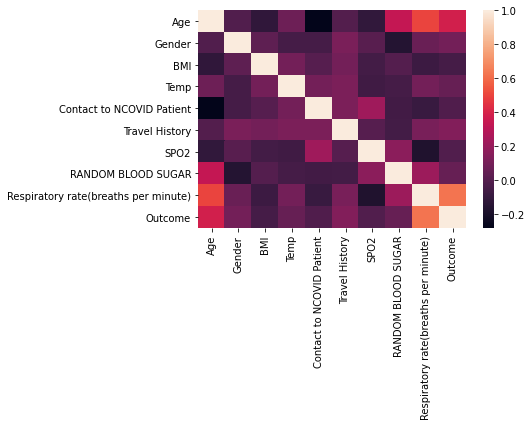

<Figure size 720x576 with 0 Axes>

In [99]:
features = df[['Age','Gender','BMI','Temp','Contact to NCOVID Patient','Travel History','SPO2','RANDOM BLOOD SUGAR','Respiratory rate(breaths per minute)','Outcome']]
sns.heatmap(features.corr())
plt.figure(figsize = (10, 8))

#### Age
First let us look at the age. Its correlation with outcome is approximately 0.435, so it does have some positive linear relationship with the outcome. 

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

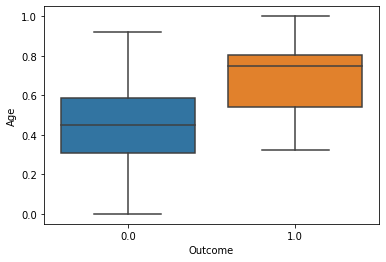

In [118]:
sns.boxplot(x="Outcome", y="Age", data=df)

It looks like age can be a good predictor of the outcome, since most of the deaths have occured in patients above the age of 60, and those below 60 have survived, except a few outliers.
Accordingly, let us group the results in age groups.
- Above 60
- 40 to 60
- 20 to 40
- Below 20

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age Groups', ylabel='count'>

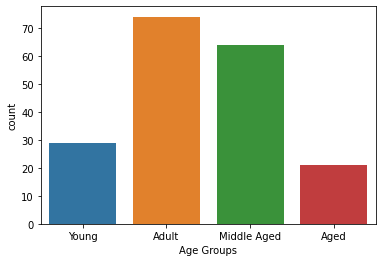

In [119]:
age_groups = np.linspace(df['Age'].min(),df['Age'].max(),5)
group_names = ['Young', 'Adult', 'Middle Aged','Aged']
df['Age Groups'] = pd.cut(df['Age'], age_groups, labels=group_names, include_lowest=True )
sns.countplot(df['Age Groups'])

In [120]:
age = df[['Age Groups','Outcome']]
grouped_age = age.groupby(['Age Groups','Outcome'],as_index=False).size()
grouped_age_pivot = grouped_age.pivot(index='Age Groups',columns='Outcome')
grouped_age_pivot

size    
Outcome      0.0 1.0
Age Groups          
Young         29   0
Adult         67   7
Middle Aged   54  10
Aged           9  12

We cannot use a chi-squared test here since the value counts can be quite small. 
Another classification worthy to look at is Above 60 and Below 60. Let us try to use fisher's exact test on the classification of above and below 60.

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Below 60    132
Above 60     56
Name: Age Above 60, dtype: int64

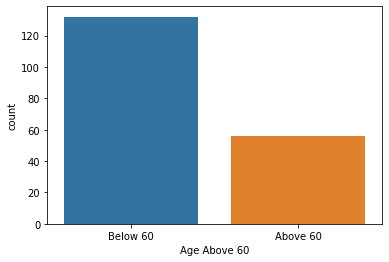

In [131]:
age_groups = [0,0.6,1]
group_names = ['Below 60','Above 60']
df['Age Above 60'] = pd.cut(df['Age'], age_groups, labels=group_names, include_lowest=True )
sns.countplot(df['Age Above 60'])
df['Age Above 60'].value_counts()

In [136]:
age = df[['Age Above 60','Outcome']]
grouped_age60 = age.groupby(['Age Above 60','Outcome'],as_index=False).size()
grouped_age60_pivot = grouped_age60.pivot(index='Age Above 60',columns='Outcome')
grouped_age60_pivot

size    
Outcome       0.0 1.0
Age Above 60         
Below 60      122  10
Above 60       37  19

#### Chi-Squared and Fisher Exact Test on age groups

In [142]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(grouped_age60_pivot))
pvalue

2.7343882537215717e-05

In [143]:
chi2, p, dof, ex = chi2_contingency(np.array(grouped_age60_pivot), correction=False)
chi2, p

(20.930455216727175, 4.76262195624435e-06)

Both these tests tell us that there is a strong correlation between the outcome of the patient and if he/she is above 60 or not. Let us explore further.

#### Gender
(description)

<AxesSubplot:xlabel='Gender', ylabel='count'>

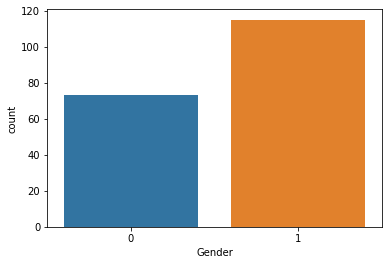

In [13]:
sns.countplot(df['Gender'])

In [104]:
df_gptest = df[['Gender','Outcome']]
grouped = df_gptest.groupby(['Gender','Outcome'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Gender',columns='Outcome')
grouped_pivot

size    
Outcome  0.0 1.0
Gender          
0         65   8
1         94  21

Fisher's exact test for gender dependency on the outcome

In [105]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(grouped_pivot))
pvalue

0.2162571534492208

Since the p-value < 5%, we can conclude that there is some dependency of gender on the final outcome.

#### Outcome probability based on age group + gender

In [152]:
age_gender = df[['Age Above 60','Gender','Outcome']]
basics = age_gender.query("Outcome == 1").groupby(['Age Above 60','Gender'],as_index=False).size()
basics_pivot = basics.pivot(index='Gender',columns='Age Above 60')
basics_pivot

size         
Age Above 60 Below 60 Above 60
Gender                        
0                   1        7
1                   9       12

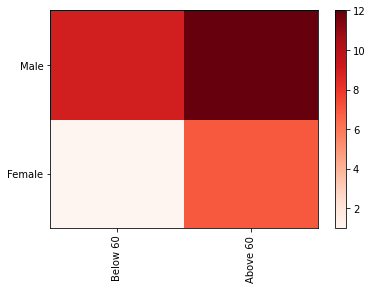

In [153]:
%matplotlib inline
fig, ax = plt.subplots()
im = ax.pcolor(basics_pivot, cmap='Reds')

#label names
row_labels = basics_pivot.columns.levels[1]
col_labels = ['Female','Male']

#move ticks and labels to the center
ax.set_xticks(np.arange(basics_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(basics_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

From the analysis above, we can see clearly that covid-affected males above the age of 60 are at the highest risk of mortality from the disease.

Let us try to develop some models that can help us see if we can classify the severity risk.

### Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Training Model

In [157]:
lm = LogisticRegression(max_iter=1000)
X = df[['Age','Gender','Temp','SPO2','Travel History','Respiratory rate(breaths per minute)','Diabetes','Heart Condition','Hypertension']]
Y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
lm.fit(x_train,y_train)
prediction = lm.predict(x_test)
score = lm.score(x_test, y_test)
print(score)

0.8421052631578947


#### How well the model runs on the training set -

Train Set


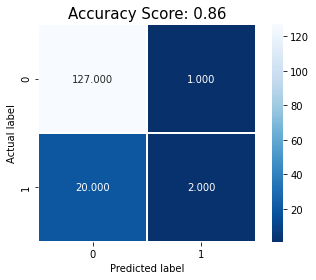

In [158]:
cm = metrics.confusion_matrix(y_train, lm.predict(x_train))
plt.figure
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
print("Train Set")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lm.score(x_train, y_train))
plt.title(all_sample_title, size = 15);
plt.savefig('covidseverity.png')

#### How well the model runs on the test set -

Test Set


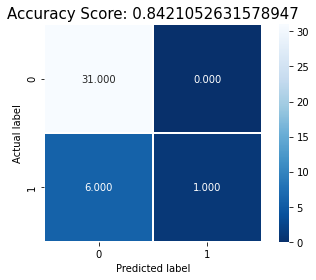

In [159]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
print("Test Set")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('covidseverity.png')

#### Error in this model

In [160]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print('The mean square error of actual and predicted value is: ', mse)

The mean square error of actual and predicted value is:  0.15789473684210525


### Symptoms, Comorbidities, Medicines

<Figure size 720x576 with 0 Axes>

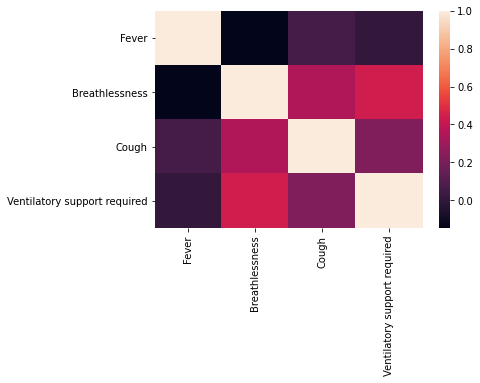

<Figure size 720x576 with 0 Axes>

In [21]:
symptoms = df[['Fever','Breathlessness','Cough','Ventilatory support required']]
sns.heatmap(symptoms.corr())
plt.figure(figsize = (10, 8))

<Figure size 720x576 with 0 Axes>

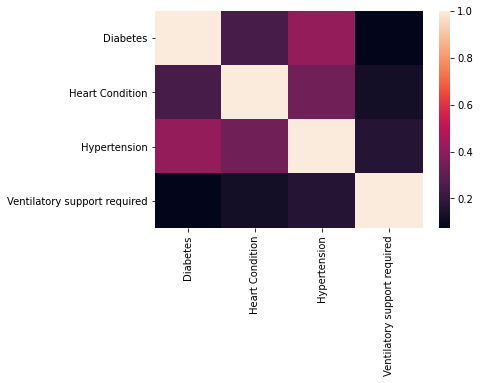

<Figure size 720x576 with 0 Axes>

In [22]:
comorbidities = df[['Diabetes','Heart Condition','Hypertension','Ventilatory support required']]
sns.heatmap(comorbidities.corr())
plt.figure(figsize = (10, 8))

## Blood 
(description)

In [46]:
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTALPROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','LACTATE DEHYDROGENASE4','C-REACTIVE PROTEINS','ERYTHROCYTE SEDIMENTATION RATE','PRO-CALCITONIN','D-DIMER','IL-6','SERUM FERRITIN','Ventilatory support required']]

In [47]:
blood

,HEMOGLOBIN,TLC COUNT,PLATELET COUNT,RANDOM BLOOD SUGAR,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,TOTAL BILIRUBIN,...,ALBUMIN,ALKALINE PHOSPHATASE,LACTATE DEHYDROGENASE4,C-REACTIVE PROTEINS,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,D-DIMER,IL-6,SERUM FERRITIN,Ventilatory support required
0,15.9,6200.0,127000,0.259876,47.5,1.3,143.0,4.8,108.0,0.5,...,3.8,44.1,933.0,58.1,8.0,NaN,98,NaN,NaN,0.0
1,13.4,4140.0,188000,0.200381,21.8,1.0,148.0,4.1,108.0,0.3,...,3.9,58.5,467.0,3.66,NaN,NaN,0.2,NaN,NaN,0.0
2,15.9,4680.0,231000,0.214660,18.3,5800.0,159000.0,18.1,1.1,0.8,...,4.2,86,499.0,10.17,4.0,0.20,0.35,NaN,NaN,0.0
3,13.2,5200.0,234000,0.255117,36.6,0.9,140.0,4.2,104.0,2.4,...,3.7,120,94.9,168.9,NaN,NaN,NaN,63.31,NaN,1.0
4,13.7,9500.0,321000,0.190861,22.0,0.9,124.0,3.8,92.0,4.2,...,3.1,177,456.0,164,8.0,NaN,350.55,4.33,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,18.2,6700.0,101000,0.447882,54.1,0.9,136.0,2.9,97.0,1.4,...,3.7,73.3,1452.0,127.6,14.0,NaN,410,NaN,NaN,1.0
187,13.9,6800.0,156000,0.331271,59.6,1.9,141.0,4.2,106.0,0.5,...,3.8,57.4,483.0,138.15,6.0,NaN,1120,37.90,NaN,1.0
188,14.9,8900.0,1820000,0.421704,25.2,1.1,137.0,4.2,106.0,1.8,...,3.3,60.1,3250.0,143,8.0,0.54,1078,735.60,NaN,2.0
189,11.2,12000.0,124000,0.471680,43.2,1.3,132.0,3.8,110.0,1.2,...,3.4,216,324.0,124,6.0,NaN,1224,NaN,NaN,1.0


### Dealing with Missing values

The columns IL-6, D-DIMER, SERUM FERTININ, PRO CALCITONIN, ERYTHROCYTE SEDIMENTATION RATE, LACTATE DEHYDROGENASE4 Have too mnay null values for us to make any useful assumptions from them. Thus we will drop these columns.

All other columns have approximately 10 null values from the same patients, so we shall drop those rows.

In [48]:
blood.drop(columns=['IL-6', 'D-DIMER', 'SERUM FERRITIN', 'PRO-CALCITONIN', 'ERYTHROCYTE SEDIMENTATION RATE', 'LACTATE DEHYDROGENASE4'],inplace=True)
blood.dropna(subset = ['Ventilatory support required'],axis=0,inplace=True)
blood.dropna(axis=0,inplace=True)
blood

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid

,HEMOGLOBIN,TLC COUNT,PLATELET COUNT,RANDOM BLOOD SUGAR,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,TOTAL BILIRUBIN,DIRECT BILIRUBIN,SGOT,SGPT,TOTALPROTEINS,ALBUMIN,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS,Ventilatory support required
0,15.9,6200.0,127000,0.259876,47.5,1.3,143.0,4.8,108.0,0.5,0.2,81.3,70,5.9,3.8,44.1,58.1,0.0
1,13.4,4140.0,188000,0.200381,21.8,1.0,148.0,4.1,108.0,0.3,0.1,22.2,14.8,6.6,3.9,58.5,3.66,0.0
2,15.9,4680.0,231000,0.214660,18.3,5800.0,159000.0,18.1,1.1,0.8,0.3,19.3,12.8,7,4.2,86,10.17,0.0
3,13.2,5200.0,234000,0.255117,36.6,0.9,140.0,4.2,104.0,2.4,1.2,59,47.9,6.3,3.7,120,168.9,1.0
4,13.7,9500.0,321000,0.190861,22.0,0.9,124.0,3.8,92.0,4.2,2.1,44.6,55.5,5.9,3.1,177,164,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,18.2,6700.0,101000,0.447882,54.1,0.9,136.0,2.9,97.0,1.4,0.5,43.8,38.8,6.2,3.7,73.3,127.6,1.0
187,13.9,6800.0,156000,0.331271,59.6,1.9,141.0,4.2,106.0,0.5,0.2,80.6,42.6,6.6,3.8,57.4,138.15,1.0
188,14.9,8900.0,1820000,0.421704,25.2,1.1,137.0,4.2,106.0,1.8,0.6,77,27.9,5.9,3.3,60.1,143,2.0
189,11.2,12000.0,124000,0.471680,43.2,1.3,132.0,3.8,110.0,1.2,0.6,56.2,43.2,5.6,3.4,216,124,1.0


In [49]:
missing_data = blood.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

HEMOGLOBIN
False    178
Name: HEMOGLOBIN, dtype: int64

TLC COUNT
False    178
Name: TLC COUNT, dtype: int64

PLATELET COUNT
False    178
Name: PLATELET COUNT, dtype: int64

RANDOM BLOOD SUGAR
False    178
Name: RANDOM BLOOD SUGAR, dtype: int64

UREA
False    178
Name: UREA, dtype: int64

CREATININE
False    178
Name: CREATININE, dtype: int64

SODIUM
False    178
Name: SODIUM, dtype: int64

POTASSIUM
False    178
Name: POTASSIUM, dtype: int64

CHLORIDE
False    178
Name: CHLORIDE, dtype: int64

TOTAL BILIRUBIN
False    178
Name: TOTAL BILIRUBIN, dtype: int64

DIRECT BILIRUBIN
False    178
Name: DIRECT BILIRUBIN, dtype: int64

SGOT
False    178
Name: SGOT, dtype: int64

SGPT
False    178
Name: SGPT, dtype: int64

TOTALPROTEINS
False    178
Name: TOTALPROTEINS, dtype: int64

ALBUMIN
False    178
Name: ALBUMIN, dtype: int64

ALKALINE PHOSPHATASE
False    178
Name: ALKALINE PHOSPHATASE, dtype: int64

C-REACTIVE PROTEINS
False    178
Name: C-REACTIVE PROTEINS, dtype: int64

Ventilatory supp

Now there are no missing values in our data.
We have 178 patients data, and now we can analyse how their blood factors are affecting the ventilatory support.

In [53]:
blood.corr()

,HEMOGLOBIN,TLC COUNT,RANDOM BLOOD SUGAR,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,Ventilatory support required
HEMOGLOBIN,1.000000,-0.086501,-0.150959,-0.132309,0.081145,0.081723,0.029140,-0.008355,0.062723
TLC COUNT,-0.086501,1.000000,0.186346,0.334080,-0.060669,-0.060719,0.081420,0.115922,0.289777
RANDOM BLOOD SUGAR,-0.150959,0.186346,1.000000,0.394072,-0.040226,-0.040697,-0.082149,0.051958,0.030026
UREA,-0.132309,0.334080,0.394072,1.000000,-0.048566,-0.050673,0.108841,0.053527,0.370060
CREATININE,0.081145,-0.060669,-0.040226,-0.048566,1.000000,0.999991,0.088858,-0.654020,-0.027741
SODIUM,0.081723,-0.060719,-0.040697,-0.050673,0.999991,1.000000,0.088571,-0.651942,-0.028586
POTASSIUM,0.029140,0.081420,-0.082149,0.108841,0.088858,0.088571,1.000000,-0.045108,0.162723
CHLORIDE,-0.008355,0.115922,0.051958,0.053527,-0.654020,-0.651942,-0.045108,1.000000,-0.021854
Ventilatory support required,0.062723,0.289777,0.030026,0.370060,-0.027741,-0.028586,0.162723,-0.021854,1.000000


<Figure size 720x576 with 0 Axes>

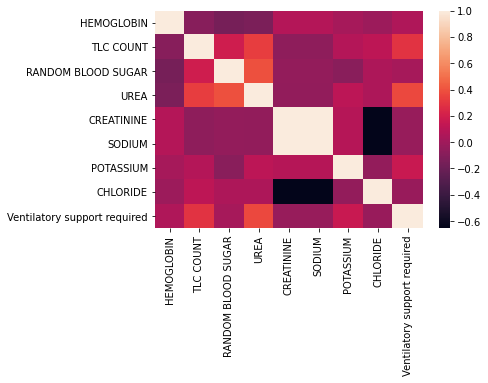

<Figure size 720x576 with 0 Axes>

In [54]:
sns.heatmap(blood.corr())
plt.figure(figsize = (10, 8))

Urea and TLC Count seem to be strong factors of indication from our initial look.

In [ ]:
from scipy.stats import chi2_contingency
  
# defining the table
data = np.array(grouped_pivot)
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')